## Non-exonic windows, with Gnocchi and various features (e.g. GC content), and enhancer-overlap status 

In [1]:
from get_windows import get_windows_with_GC_content_and_cpg_islands 

WINDOWS = get_windows_with_GC_content_and_cpg_islands()
WINDOWS 

/scratch/ucgd/lustre-labs/quinlan/data-shared/constraint-tools


,chrom,start,end,gnocchi,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,maternal_recombination_rate,...,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_1000bp,GC_content_10000bp,GC_content_100000bp,GC_content_1000000bp,cpg_island_overlap,window_overlaps_cpg_island,N_mean_null_gnocchi
0,chr1,1432000,1433000,4.299894,259,True,False,0.653,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.661339,0.641836,0.565094,0.577534,NaN,False,338.059552
1,chr1,1451000,1452000,0.666316,291,False,False,0.652,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.556444,0.552845,0.572894,0.575506,NaN,False,302.590657
2,chr1,1453000,1454000,0.828398,256,False,False,0.651,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.537463,0.561944,0.572564,0.575129,NaN,False,269.601925
3,chr1,1458000,1459000,-0.086128,272,False,False,0.651,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.532468,0.596740,0.570774,0.575225,NaN,False,270.583243
4,chr1,1463000,1464000,2.948188,191,True,False,0.651,0.039046,0.025852,...,0.513191,0.105518,2.585568,0.540460,0.568843,0.576514,0.574420,NaN,False,236.321790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019146,chr9,137262000,137263000,-2.396149,302,True,False,0.536,0.057053,0.063434,...,3.636507,0.219258,2.281162,0.500499,0.542646,0.611944,0.568316,45.0,True,263.131293
1019147,chr9,137268000,137269000,3.640544,212,True,False,0.536,0.057053,0.063434,...,3.636507,0.219258,2.281162,0.552448,0.589941,0.613074,0.567839,NaN,False,272.046527
1019148,chr9,137269000,137270000,5.276351,209,True,False,0.536,0.057053,0.063434,...,3.636507,0.219258,2.281162,0.519481,0.585042,0.613494,0.567623,NaN,False,300.458958
1019149,chr9,137275000,137276000,2.687348,290,True,False,0.536,1.564889,0.024254,...,3.636507,0.219258,2.281162,0.603397,0.639236,0.610484,0.567380,NaN,False,339.517045


## Gaussian Naive-Bayes model

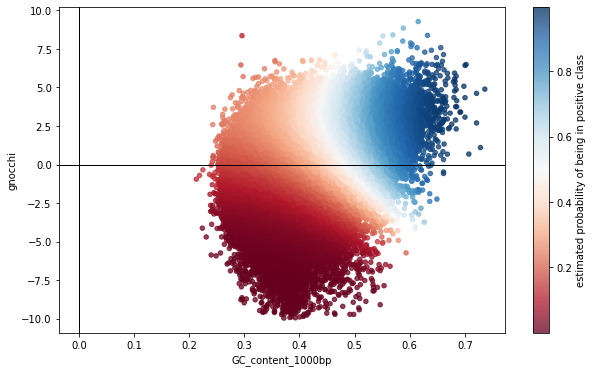

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

def f(df, gc_window_size):
  features = ['gnocchi', f'GC_content_{gc_window_size}bp']
  X = df[features]
  y = df['window overlaps enhancer']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create an instance of the model
  model = GaussianNB()

  # Fit the model to the training data
  model.fit(X_train, y_train)

  # Predict the probabilities of "window overlaps enhancer" == True on the testing data
  estimated_probabilities = model.predict_proba(X_test)[:, 1]

  x = np.array(X_test[features[1]])
  y = np.array(X_test[features[0]])
  c = estimated_probabilities

  # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
  fig, axis = plt.subplots(figsize=(10,6))
  plt.scatter(x, y, c=c, s=20, cmap='RdBu', alpha=0.75) 
  plt.xlabel(features[1])
  plt.ylabel(features[0])
  cbar = plt.colorbar()
  cbar.set_label('estimated probability of being in positive class')
  plt.axhline(linewidth=1, color='black')
  plt.axvline(linewidth=1, color='black')
  plt.show() 

f(WINDOWS, 1000)

In [ ]:
# TODO: 
# compare LRT statistic from gnocchi, gnocchi+GC, gnocchi+BGS, gnocchi+gBGC, etc to demonstrate which features have the greatest effect on the probability of a window overlapping an enhancer
# can effect size of GC content, etc be inferred from GaussianNB model, or must we use logistic regression?
# Assess performance by comparing the predicted probabilities to the fraction of windows that overlap enhancers in the test set in bins of gnocchi and GC content